# Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")

import warnings
warnings.filterwarnings("ignore", message="Your warning message here")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset /Machine Learning/Clustered_Customer_Data.csv")
print(df.shape)
df.head()

(8950, 19)


Unnamed: 0      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0           0    40.900749           0.818182      95.40              0.00   
1           1  3202.467416           0.909091       0.00              0.00   
2           2  2495.148862           1.000000     773.17            773.17   
3           3  1666.670542           0.636364    1499.00           1499.00   
4           4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        3  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum()

Unnamed: 0                          0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, Cluster]
Index: []

In [ ]:
df.describe()

Unnamed: 0       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  8950.000000   8950.000000        8950.000000   8950.000000   
mean   4474.500000   1564.474828           0.877271   1003.204834   
std    2583.786788   2081.531879           0.236904   2136.634782   
min       0.000000      0.000000           0.000000      0.000000   
25%    2237.250000    128.281915           0.888889     39.635000   
50%    4474.500000    873.385231           1.000000    361.280000   
75%    6711.750000   2054.140036           1.000000   1110.130000   
max    8949.000000  19043.138560           1.000000  49039.570000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       8950.000000             8950.000000   8950.000000   
mean         592.437371              411.067645    978.871112   
std         1659.887917              904.338115   2097.163877   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           38.000000               89.000000      0.000000   
75%          577.405000              468.637500   1113.821139   
max        40761.250000            22500.000000  47137.211760   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          8950.000000                 8950.000000   
mean              0.490351                    0.202458   
std               0.401371                    0.298336   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.300000   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       8950.000000             8950.000000   
mean                           0.364437                0.135144   
std                            0.397448                0.200121   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.222222   
max                            1.000000                1.500000   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       8950.000000    8950.000000   8950.000000   8950.000000   
mean           3.248827      14.709832   4494.449450   1733.143852   
std            6.824647      24.857649   3638.612411   2895.063757   
min            0.000000       0.000000     50.000000      0.000000   
25%            0.000000       1.000000   1600.000000    383.276166   
50%            0.000000       7.000000   3000.000000    856.901546   
75%            4.000000      17.000000   6500.000000   1901.134317   
max          123.000000     358.000000  30000.000000  50721.483360   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE      Cluster  
count       8950.000000       8950.000000  8950.000000  8950.000000  
mean         864.206542          0.153715    11.517318     1.442011  
std         2330.588021          0.292499     1.338331     1.373951  
min            0.019163          0.000000     6.000000     0.000000  
25%          170.857654          0.000000    12.000000     0.000000  
50%          335.628312          0.000000    12.000000     2.000000  
75%          864.206542          0.142857    12.000000     3.000000  
max        76406.207520          1.000000    12.000000     3.000000

In [ ]:
!pip install pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(
    df, title="Pandas Profiling Report dataset"
)
profile.to_notebook_iframe()

Data have no missing values or duplicated values and any error values. This dataset kinda clean

Unnamed similar to index value so I'm gonna drop it

BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CASH_ADVANCE_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS distribution is skewed right and have outliers cause max value is far from Q3 quantile value

PURCHASE_TRX distribution skew left not much but it have outliers around max values

BALANCE_FREQUENCY is skewed left and have outliers

TENURE, Cluster might be a categorical data but have already encoded so dont have any problem seriously

In [ ]:
for c in ['TENURE','Cluster']:
    print(df[c].value_counts())

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64
0    3976
3    3367
2    1198
1     409
Name: Cluster, dtype: int64


In [ ]:
df = df.iloc[:, 1:]
print(df.shape)
df.head()

(8950, 18)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        3  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

In [ ]:
# Get numerical columns and don't pay attention 2 last feature TENURE and Cluster
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]
numerical_cols = np.array(numerical_cols).reshape(6, 3)
numerical_cols

array([['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES'],
       ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'],
       ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY'],
       ['CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX'],
       ['CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'],
       ['PRC_FULL_PAYMENT', 'TENURE', 'Cluster']], dtype='<U32')

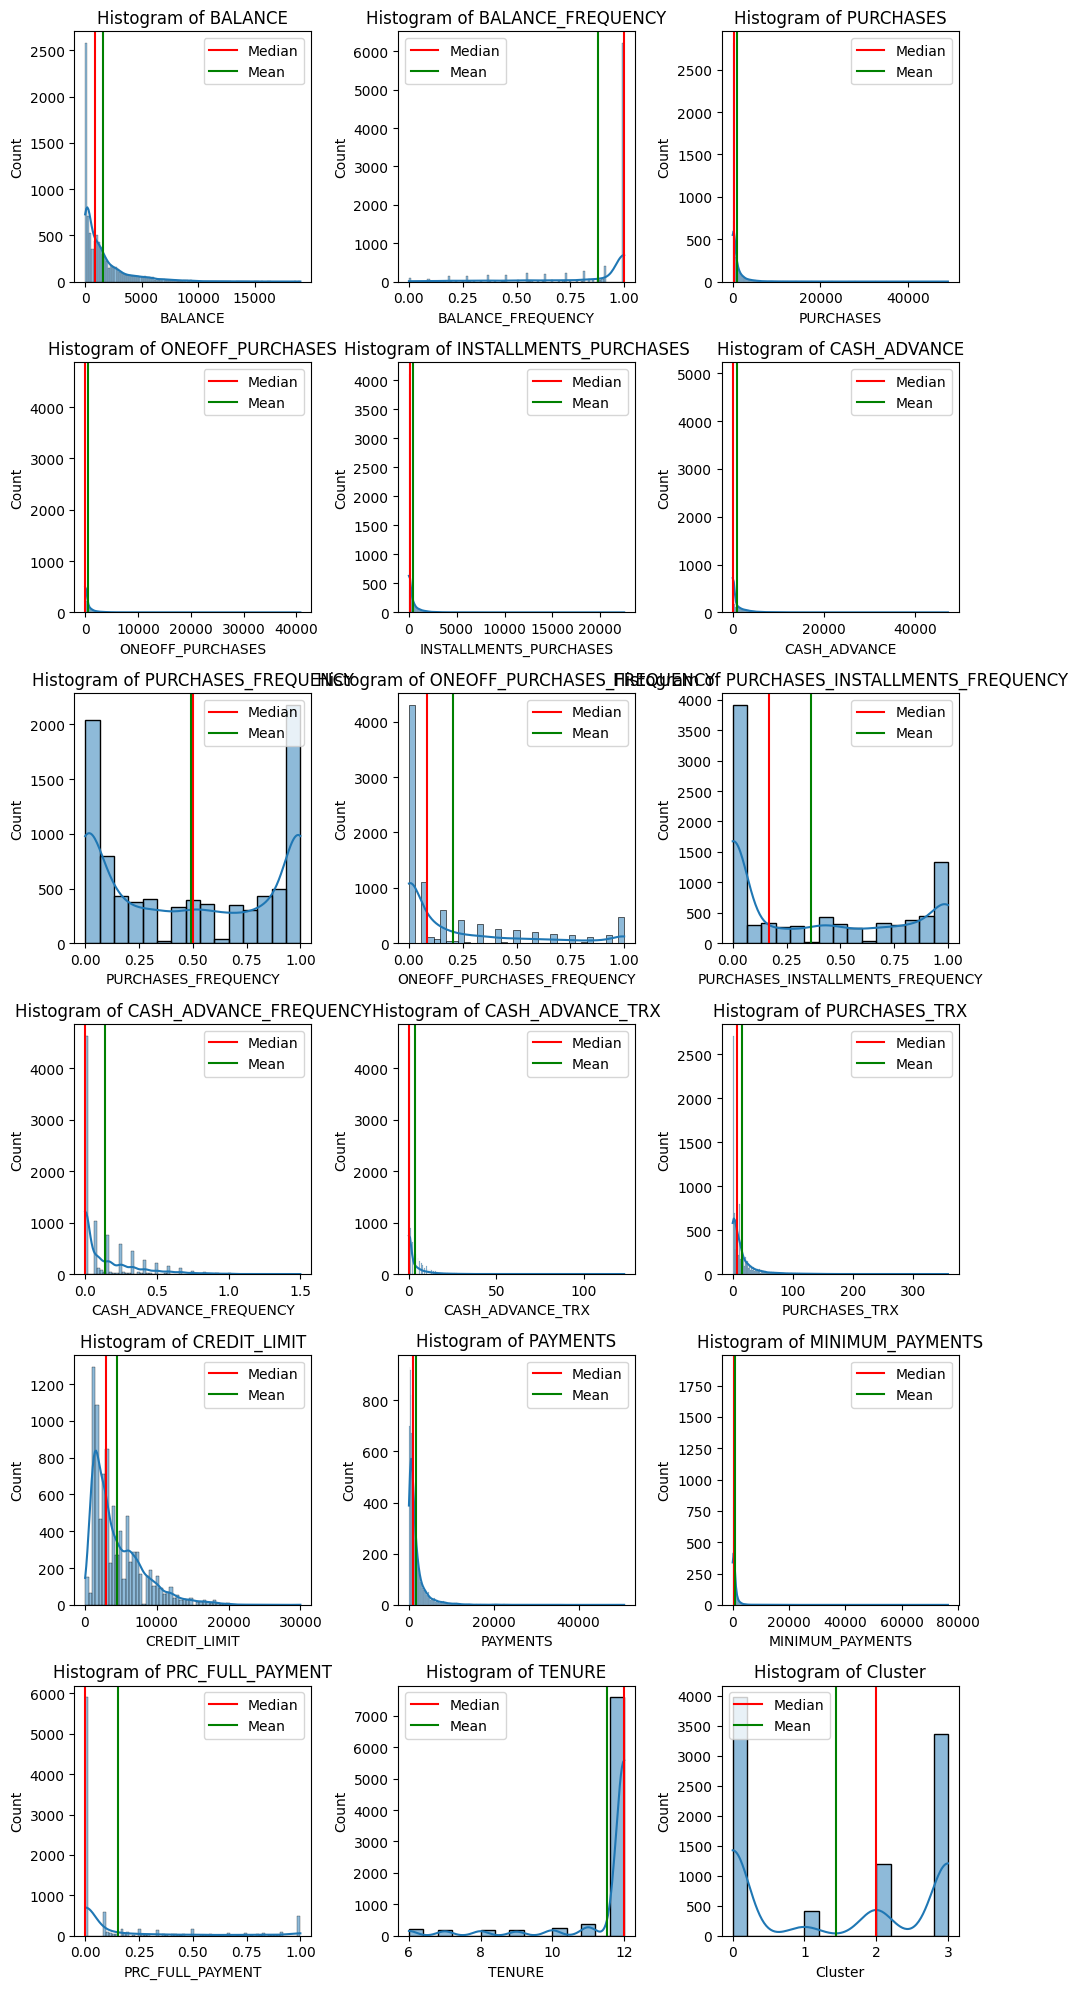

In [ ]:
fig, ax = plt.subplots(numerical_cols.shape[0], numerical_cols.shape[1], figsize = (10, 20))

for i in range(numerical_cols.shape[0]):
    for j in range(numerical_cols.shape[1]):
        if numerical_cols[i, j] == '':
            continue
        sns.histplot(data = df, x = numerical_cols[i, j], ax = ax[i, j], kde = True)
        ax[i, j].set_title('Histogram of ' + numerical_cols[i,j])
        ax[i, j].axvline(x = df[numerical_cols[i, j]].median(), color = 'red', label = 'Median')
        ax[i, j].axvline(x = df[numerical_cols[i, j]].mean(), color = 'green', label = 'Mean')
        ax[i, j].legend()

plt.tight_layout()
plt.show()
fig.show()

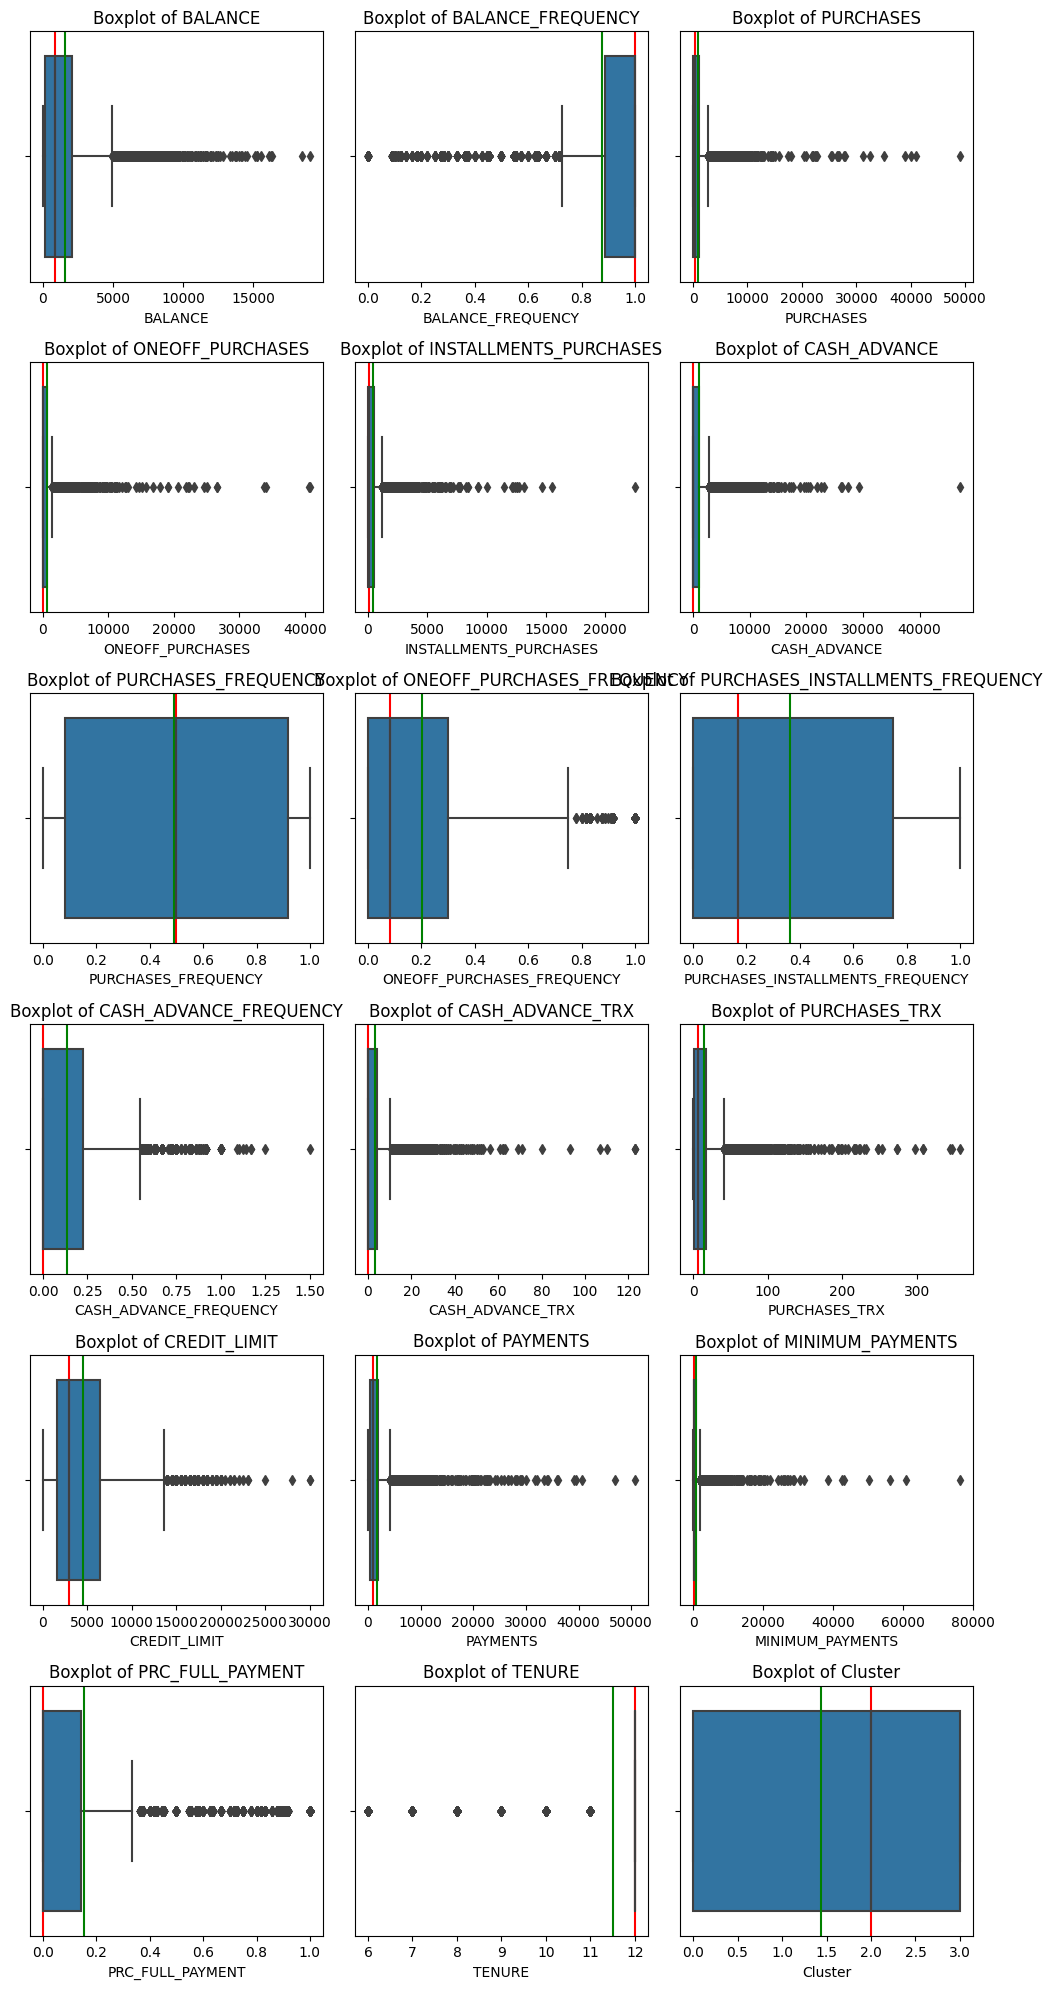

In [ ]:
fig, ax = plt.subplots(numerical_cols.shape[0], numerical_cols.shape[1], figsize = (10, 20))

for i in range (numerical_cols.shape[0]):
    for j in range(numerical_cols.shape[1]):
        if numerical_cols[i, j] == '':
            continue
        sns.boxplot(data = df, x = numerical_cols[i, j], ax = ax[i, j])
        ax[i, j].set_title('Boxplot of '+ numerical_cols[i, j])
        ax[i, j].axvline(x = df[numerical_cols[i,j]].median(), color = 'red', label = 'Median')
        ax[i, j].axvline(x = df[numerical_cols[i, j]].mean(), color = 'green', label = 'Mean')

plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='TENURE', ylabel='count'>

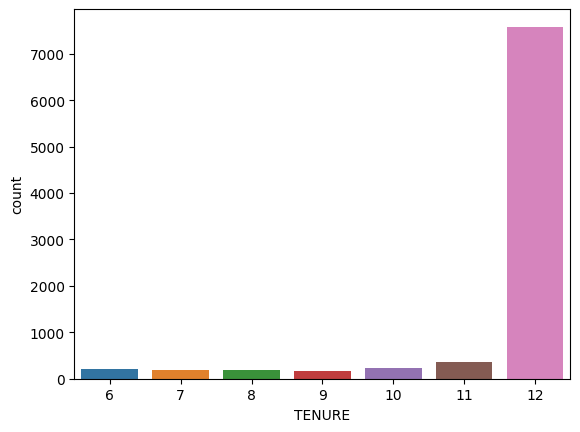

In [ ]:
sns.countplot(data = df, x = 'TENURE')

<AxesSubplot: >

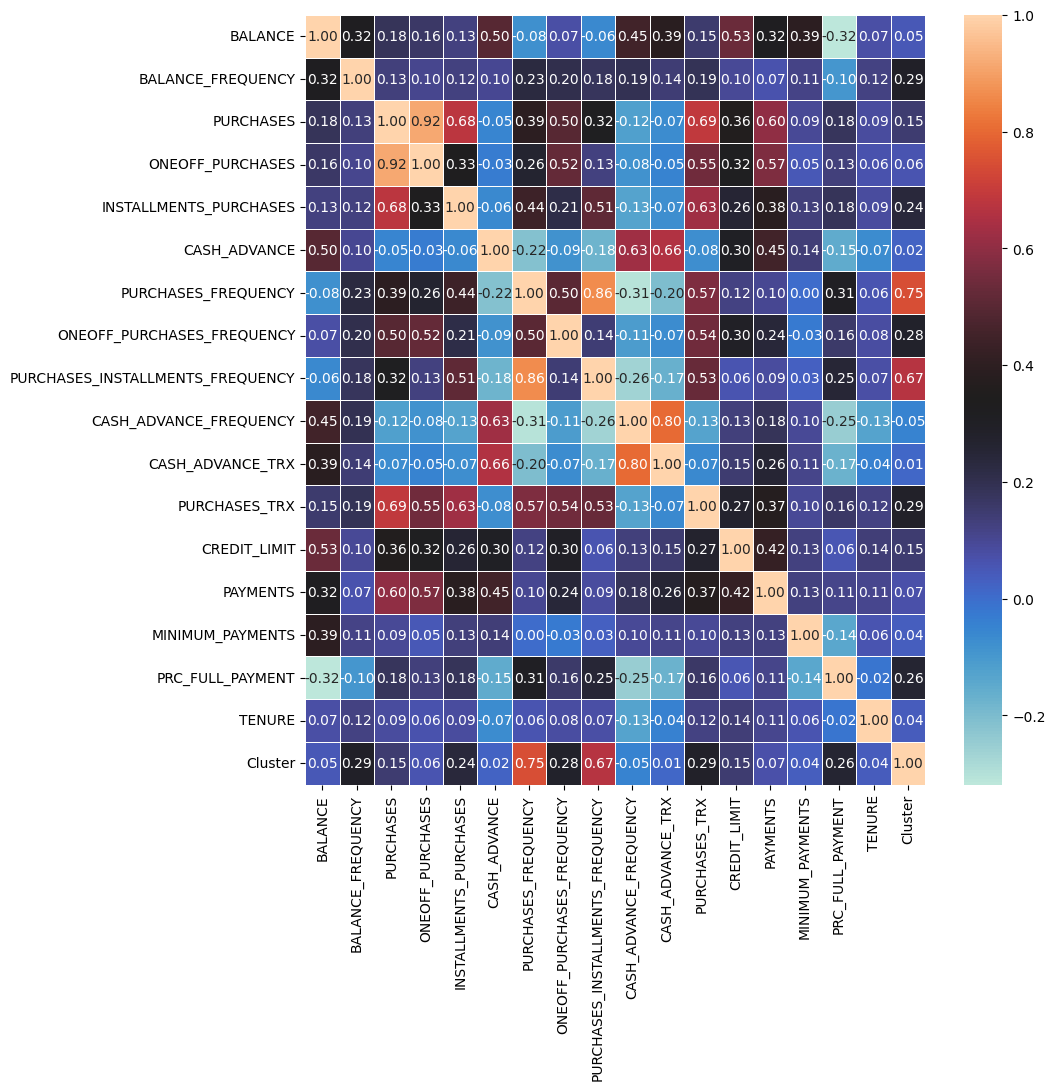

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cmap = 'icefire', annot = True, linewidth = .5, fmt = '.2f')

# Feature Engineering

## Remove anomaly

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
preprocessed_df = df.copy()

In [ ]:
model=IsolationForest(n_estimators=100,max_samples='auto',random_state=42)
model.fit(preprocessed_df)
preprocessed_df['anomaly'] = model.predict(preprocessed_df)

preprocessed_df[preprocessed_df['anomaly']==-1]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
6       627.260806           1.000000    7091.01           6402.63   
21     6369.531318           1.000000    6359.95           5910.04   
23     3800.151377           0.818182    4248.35           3454.56   
30    12136.219960           1.000000    3038.01           1013.20   
34     3517.101616           0.727273     547.28              0.00   
...            ...                ...        ...               ...   
8923    486.661842           0.833333    1898.88            939.09   
8930    229.540018           1.000000      84.00              0.00   
8932     39.552396           1.000000     180.00              0.00   
8941   5967.475270           0.833333     214.55              0.00   
8949    372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
6                     688.38      0.000000             1.000000   
21                    449.91    229.028245             1.000000   
23                    793.79   7974.415626             1.000000   
30                   2024.81   3183.583301             1.000000   
34                    547.28      0.000000             1.000000   
...                      ...           ...                  ...   
8923                  959.79      0.000000             0.833333   
8930                   84.00    304.951421             1.000000   
8932                  180.00      0.000000             1.000000   
8941                  214.55   8555.409326             0.833333   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
6                       1.000000                          1.000000   
21                      0.916667                          1.000000   
23                      0.083333                          0.916667   
30                      0.166667                          1.000000   
34                      0.000000                          1.000000   
...                          ...                               ...   
8923                    0.666667                          0.666667   
8930                    0.000000                          0.833333   
8932                    0.000000                          0.833333   
8941                    0.000000                          0.666667   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
6                   0.000000                 0             64       13500.0   
21                  0.333333                 6             92       11250.0   
23                  0.333333                13             13        9000.0   
30                  0.500000                10             64       13000.0   
34                  0.000000                 0             14       11000.0   
...                      ...               ...            ...           ...   
8923                0.000000                 0             24        1200.0   
8930                0.333333                 4              6        1000.0   
8932                0.000000                 0              6        1000.0   
8941                0.666667                13              5        9000.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  \
6     6354.314328        198.065894               1.0      12        1   
21    2077.959051       1659.775075               0.0      12        1   
23    9479.043842       1425.426525               0.0      12        2   
30    4230.323491       3292.015030               0.0      12        2   
34    8735.607835      17862.558310               0.0      12        3   
...           ...               ...               ...     ...      ...   
8923   669.039640        336.880119               0.5    

In [ ]:
preprocessed_df = preprocessed_df[preprocessed_df['anomaly']!= -1]
preprocessed_df = preprocessed_df.drop('anomaly', axis = 1)
preprocessed_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8944   193.571722           0.833333    1012.73           1012.73   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8944                    0.00      0.000000             0.333333   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8944                    0.333333                          0.000000   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8944                0.000000                 0              2        4000.0   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        2  
2      622.066742        627.284787          0.000000      12        3  
3        0.000000        864.206542          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8944     0.000000        864.206542          0.000000       6        0  
89

## Handling Outlier

In [ ]:
def remove_outlier(data, feature, lower_bound, upper_bound):
    Q1 = data[feature].quantile(lower_bound) # or Q1 = np.percentile(df['column'], 0.25)
    Q3 = data[feature].quantile(upper_bound)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5*IQR
    upper_extreme = Q3 + 1.5*IQR

    outliers = data[(data[feature] < lower_extreme) | (data[feature] > upper_extreme)]
    percent_outliers = len(outliers) / len(data) * 100
    print('Percent of outlier in',feature,':',percent_outliers)

    data = data.drop(outliers.index)

    return data

def imputate_outlier(data, feature, lower_bound, upper_bound):
    Q1 = data[feature].quantile(lower_bound) # or Q1 = np.percentile(df['column'], lower_bound)
    Q3 = data[feature].quantile(upper_bound)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5*IQR
    upper_extreme = Q3 + 1.5*IQR

    outliers = data[(data[feature] < lower_extreme) | (data[feature] > upper_extreme)]
    percent_outliers = len(outliers) / len(data) * 100
    print('Percent of outlier in',feature,':',percent_outliers)

    data.loc[df[feature] < lower_extreme, feature] = Q1
    data.loc[df[feature] > upper_extreme, feature] = Q3

    return data

In [ ]:
for f in ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',\
          'CASH_ADVANCE_FREQUENCY','CREDIT_LIMIT','MINIMUM_PAYMENTS','PAYMENTS']:
    preprocessed_df = imputate_outlier(preprocessed_df, f, 0.25, 0.75)

Percent of outlier in BALANCE : 7.002907344204272
Percent of outlier in PURCHASES : 6.737454177727216
Percent of outlier in ONEOFF_PURCHASES : 11.490329920364049
Percent of outlier in INSTALLMENTS_PURCHASES : 8.456579446340537
Percent of outlier in CASH_ADVANCE : 10.85829857160915
Percent of outlier in CASH_ADVANCE_FREQUENCY : 6.332954114524081
Percent of outlier in CREDIT_LIMIT : 1.782328403488813
Percent of outlier in MINIMUM_PAYMENTS : 7.306282391606624
Percent of outlier in PAYMENTS : 6.952344836303881


In [ ]:
print(preprocessed_df.shape)
preprocessed_df.head()

(7911, 18)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00            400.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0    949.512495             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        0  
1  1515.611728       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        3  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

## Feature Transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
scaled_df = scaler.fit_transform(preprocessed_df.copy())

scaled_df = pd.DataFrame(scaled_df, columns = preprocessed_df.columns)
scaled_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -1.237538          -1.021465  -0.343698         -0.948104   
1     1.490199          -0.377639  -1.487646         -0.948104   
2     1.225730           0.635196   0.813833          1.309829   
3     0.836203          -1.664119   1.328326          1.140699   
4     0.249766           0.635196  -0.936747          0.176412   
...        ...                ...        ...               ...   
7906 -0.625686          -0.933918   1.013219          1.140699   
7907 -1.343523           0.635196   0.196455         -0.948104   
7908 -1.446653           0.635196   0.213247         -0.948104   
7909 -1.396483          -0.933918  -0.160873         -0.948104   
7910 -1.528551          -0.933918  -1.487646         -0.948104   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.514928     -0.928298            -0.672975   
1                  -1.061742      1.161934            -1.246086   
2                  -1.061742     -0.928298             1.272465   
3                  -1.061742      0.805328            -0.947556   
4                  -1.061742     -0.928298            -0.947556   
...                      ...           ...                  ...   
7906               -1.061742     -0.928298            -0.182609   
7907                0.919451     -0.928298             1.272465   
7908                0.930501     -0.928298             1.272465   
7909                0.663855     -0.928298             0.964456   
7910               -1.061742      0.341439            -1.246086   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.863201                         -0.542660   
1                      -0.863201                         -0.974658   
2                       1.817733                         -0.974658   
3                       0.092317                         -0.974658   
4                       0.092317                         -0.974658   
...                          ...                               ...   
7906                    1.293497                         -0.974658   
7907                   -0.863201                          1.240237   
7908                   -0.863201                          1.240237   
7909                   -0.863201                          1.019697   
7910                   -0.863201                         -0.974658   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.890937         -0.890955      -0.516219     -1.383158   
1                   1.388715          1.137432      -1.351258      1.178910   
2                  -0.890937         -0.890955       0.636674      1.280930   
3                   0.345246          0.280442      -0.827226      1.280930   
4                  -0.890937         -0.890955      -0.827226     -1.167217   
...                      ...               ...            ...           ...   
7906               -0.890937         -0.890955      -0.516219      0.381206   
7907               -0.890937         -0.890955       0.144520     -1.383158   
7908               -0.890937         -0.890955       0.144520     -1.383158   
7909               -0.890937         -0.890955       0.023210     -1.383158   
7910                1.012355          0.732118      -1.351258     -2.162934   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE   Cluster  
0    -1.106388         -0.910892         -0.654145  0.406883 -1.005484  
1     0.867540          1.383285          1.370117  0.406883  0.646211  
2    -0.216156          0.682014         -0.654145  0.406883  1.067981  
3    -2.394787          1.091584         -0.654145  0.406883 -1.005484  
4    -0.128071         -0.373344         -0.654145  0.406883 -1.005484  
...        ...               ...               ...       ...       ...  
7906 -2.394787          1.091584         -0.654145 -2.596662 -1.005484  
7907 -0.780091         -1.755292   

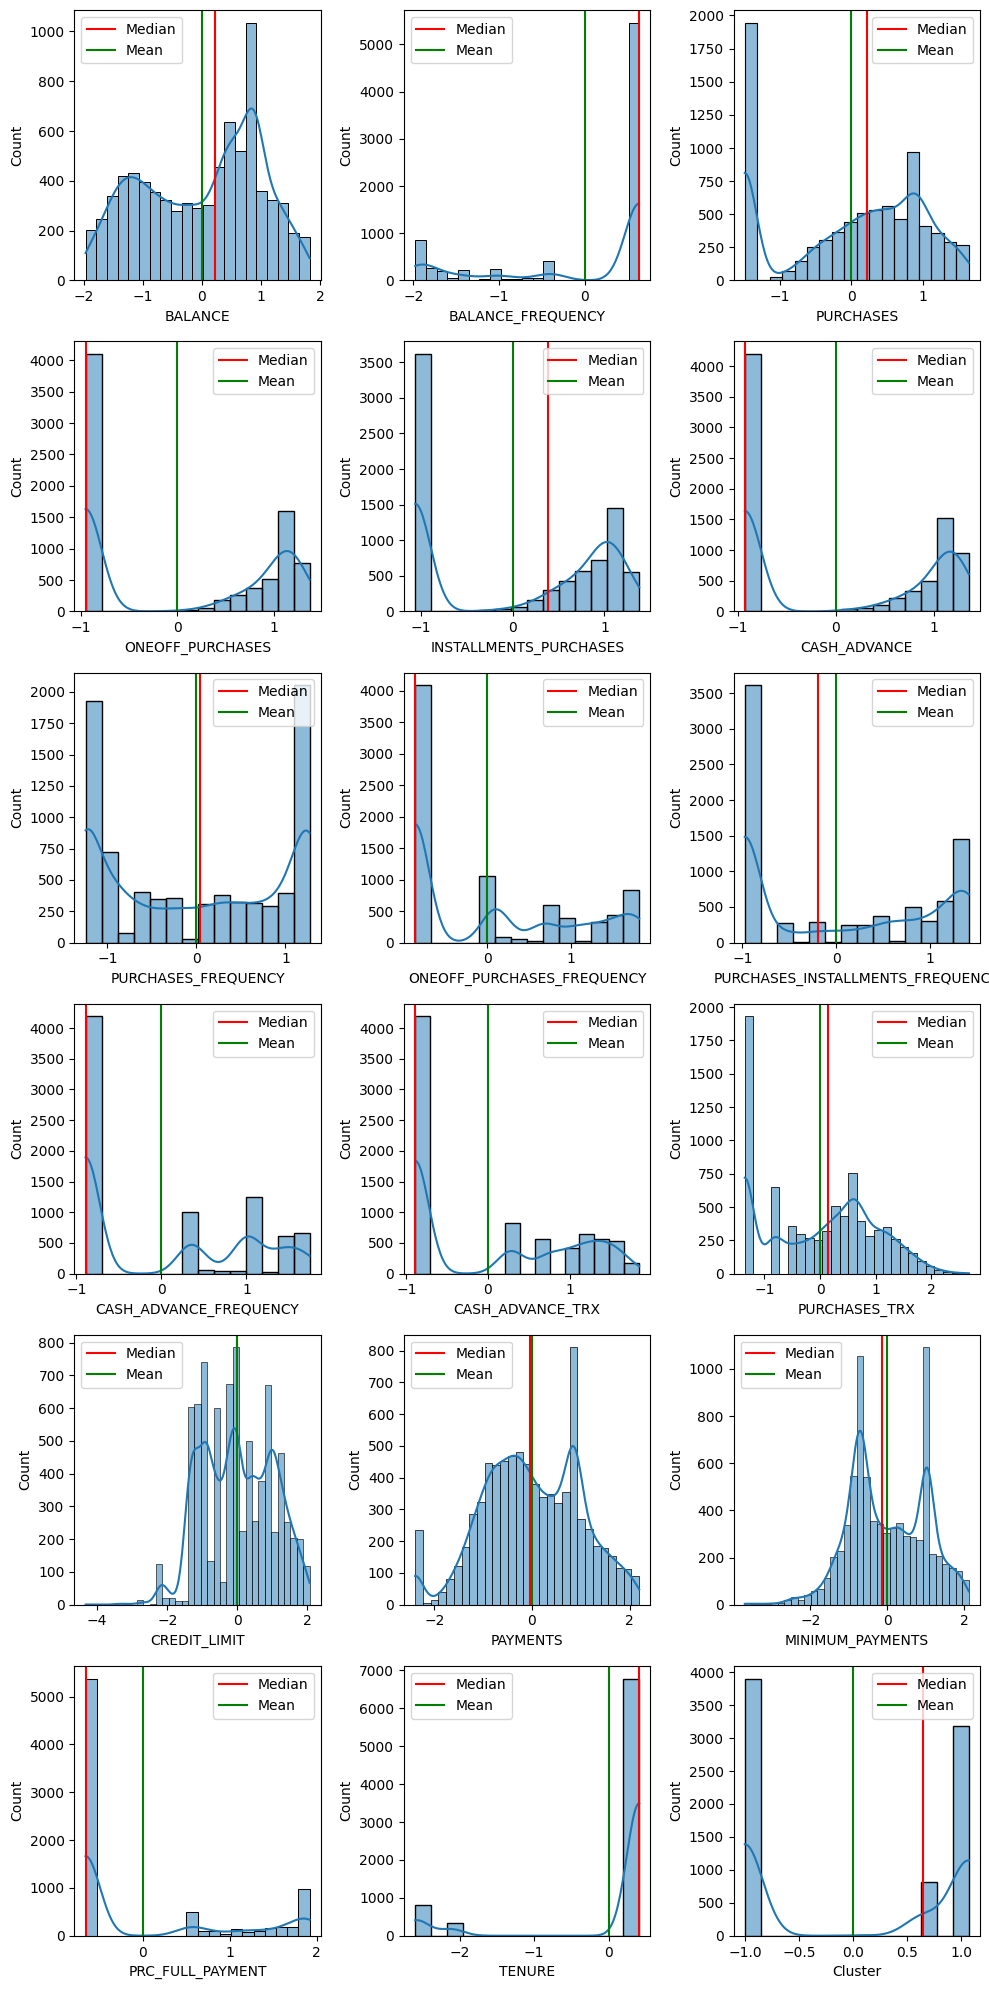

In [ ]:
fig, ax = plt.subplots(numerical_cols.shape[0], numerical_cols.shape[1], figsize = (10, 20))

for i in range(numerical_cols.shape[0]):
    for j in range(numerical_cols.shape[1]):
        if numerical_cols[i, j] == '':
            continue
        sns.histplot(data = scaled_df, x = numerical_cols[i, j], ax = ax[i, j], kde = True)
        ax[i, j].axvline(x = scaled_df[numerical_cols[i, j]].median(), color = 'red', label = 'Median')
        ax[i, j].axvline(x = scaled_df[numerical_cols[i, j]].mean(), color = 'green', label = 'Mean')
        ax[i, j].legend()

plt.tight_layout()
plt.show()
fig.show()

## Feature Selection


Before applying K-means clustering, there is no collinearity (a high level of correlation between two variables). Correlated variables are not useful for ML segmentation algorithms because they represent the same characteristic of a segment. So correlated variables are nothing but noise. https://trcmarketresearch.com/whitepaper/cluster-analysis-gets-complicated/

<Axes: >

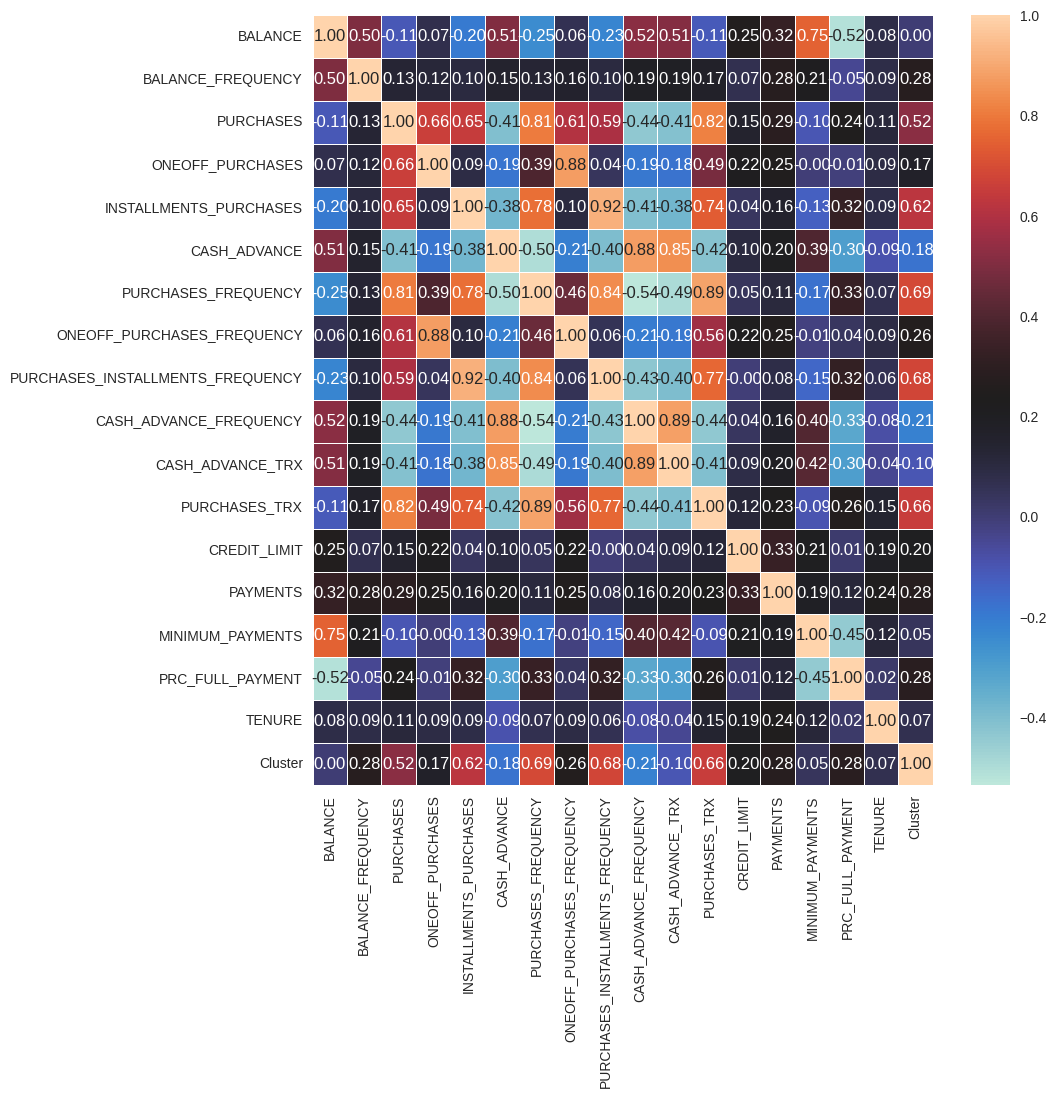

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(scaled_df.corr(), cmap = 'icefire', annot = True, linewidth = .5, fmt = '.2f')

After using various technical feature engineering, I have some high correlation between features:

PURCHASE_FREQ - PURCHASES = 0.81

PURCHASE_FREQ - INSTALLMENT_PURCHASES = 0.78

PURCHASE_FREQ - PURCHASE_TRX = 0.89

PURCHASES_TRX - PURCHASE = 0.82

PURCHASES_TRX - INSTALLMENT_PURCHASES = 0.74

PURCHASES_TRX - PURCAHSES_INSTALL_FREQ = 0.77

PUR_INSTALL_FREQ - INSTALL_PURCHASE = 0.92

PUR_INSTALL_FREQ - PUR_FREQ = 0.84

CASH_ADVANCE_FREQ - CASH_ADVANCE = 0.88

CASH_ADVACNE_TRX - CASH_ADVANCE = 0.85

CASH_ADVANCE_TRX - CASH_ADVANCE_FREQ = 0.89

=> Decide to drop CASH_ADVANCE_FREQUENCY, PURCHASE_FREQUENCY, PURCHASES_TRX and Cluster(cause it ground truth or something =)))


In [ ]:
scaled_df = scaled_df.drop(['CASH_ADVANCE_FREQUENCY','PURCHASES_FREQUENCY','PURCHASES_TRX','Cluster'], axis = 1)

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(scaled_df.copy())

# Model Part

## K-Means

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
def clustering_evaluation(data, max_K = 10):
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))

    elbow_method = KElbowVisualizer(KMeans(random_state = 42), k=(1,max_K+1), ax = ax[0, 0])
    elbow_method.fit(data)

    K = np.arange(2, max_K).tolist()
    silhouette_avg = []
    DB_avg = []
    calinski_avg = []
    for num_clusters in K:
        # initialise kmeans
        kmeans = KMeans(n_clusters=num_clusters, random_state = 42)
        kmeans.fit(data)
        cluster_labels = kmeans.labels_
        # Davies_bouldin score: the lower DB the better is clustering
        DB_avg.append(davies_bouldin_score(data, cluster_labels))

        # calinski_harabasz_score: The higher the index the better is clustering.
        calinski_avg.append(calinski_harabasz_score(data, cluster_labels))

        # silhouette score: with range[-1: 1], the more close to 1, the better is clustering and vice versa
        silhouette_avg.append(silhouette_score(data, cluster_labels))
    ax[0, 1].plot(K, silhouette_avg, 'bx-', label='Silhouette')
    ax[0, 1].set_xlabel('Value of K')
    ax[0, 1].set_ylabel('Score')
    ax[0, 1].set_title('Silhouette Scores')
    ax[0, 1].legend()

    ax[1, 0].plot(K, calinski_avg, 'bx-', color = 'red', label='Calinski-Harabasz')
    ax[1, 0].set_xlabel('Value of K')
    ax[1, 0].set_ylabel('Score')
    ax[1, 0].set_title('Calinski-Harabasz Scores')

    ax[1, 1].plot(K, DB_avg, 'bx-', color = 'green', label='Davies-Bouldin')
    ax[1, 1].set_xlabel('Value of K')
    ax[1, 1].set_ylabel('Score')
    ax[1, 1].set_title('Davies-Bouldin Scores')

    plt.tight_layout()
    elbow_method.show()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

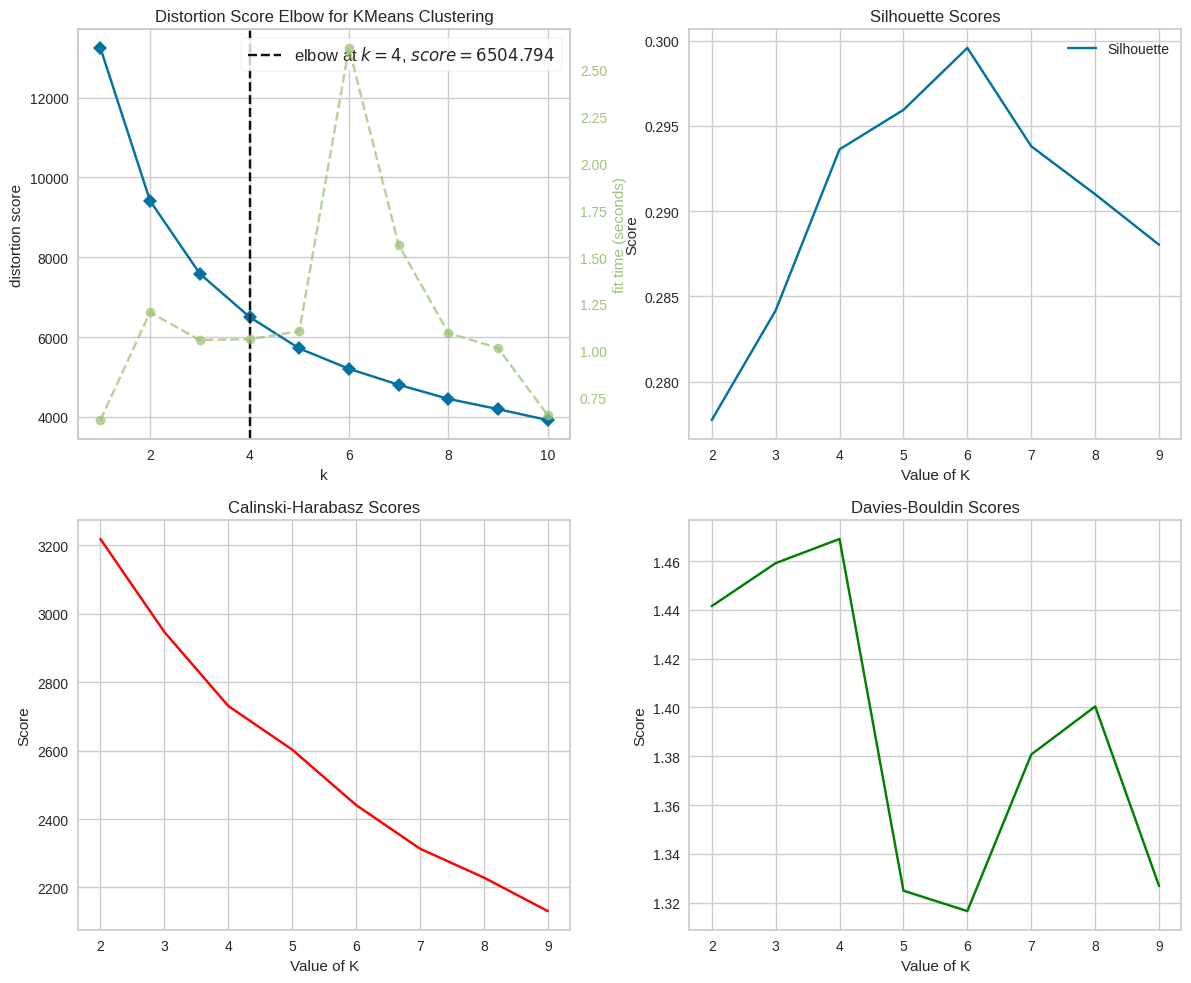

In [ ]:
clustering_evaluation(scaled_data)

In [ ]:
kmeans_model = KMeans(n_clusters = 6, random_state = 42)
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [ ]:
#để xuất ra label của tập training (scaled_data) ta dùng .labels_
kmeans_model.labels_

array([2, 4, 1, ..., 2, 2, 4], dtype=int32)

In [ ]:
#để dự đoán ra label của tập testing (ta giả sử là scaled_data) ta dùng .predict
kmeans_model.predict(scaled_data)

array([2, 4, 1, ..., 2, 2, 4], dtype=int32)

In [ ]:
#Để xuất ra các centroids ta có thể dùng .cluster_centers_
kmeans_model.cluster_centers_

array([[6.73489599e-01, 8.46570693e-01, 5.43029724e-01, 8.23144752e-01,
        4.24324090e-02, 8.64384059e-01, 6.02216520e-01, 1.84402044e-02,
        7.03623162e-01, 6.86741337e-01, 5.53764475e-01, 7.09553287e-01,
        1.14219166e-01, 8.35279617e-01],
       [4.12918788e-01, 5.92216754e-01, 5.82980621e-01, 8.35220782e-01,
        5.08103891e-02, 4.02484589e-03, 6.36884879e-01, 2.36161198e-02,
        3.27288705e-03, 6.78985601e-01, 4.55331196e-01, 5.77118231e-01,
        1.78073157e-01, 8.70311995e-01],
       [2.89936061e-01, 6.19683852e-01, 5.60810609e-01, 1.56070564e-02,
        7.92159720e-01, 1.23574885e-02, 9.84109765e-03, 7.78999805e-01,
        8.28001518e-03, 6.28610960e-01, 4.21701631e-01, 5.43647066e-01,
        4.84226787e-01, 8.64563611e-01],
       [7.03261574e-01, 9.33469287e-01, 7.01191249e-01, 5.68643679e-01,
        8.22558749e-01, 8.73791178e-01, 4.44878375e-01, 7.75735837e-01,
        6.90056980e-01, 6.98427672e-01, 6.26532255e-01, 7.45823548e-01,
        1.201

## Apply PCA for K-means

In [ ]:
from sklearn.decomposition import PCA

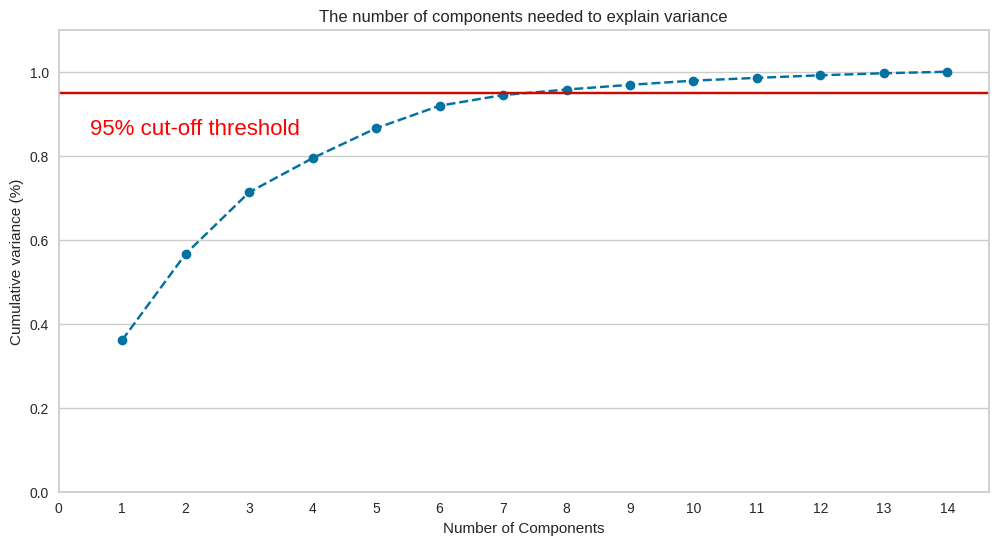

In [ ]:
pca = PCA().fit(scaled_data)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, scaled_df.shape[1]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, scaled_df.shape[1]+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

### 8 components

In [ ]:
pca = PCA(n_components=8, random_state = 42)
pca_df = pd.DataFrame(pca.fit_transform(scaled_data))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

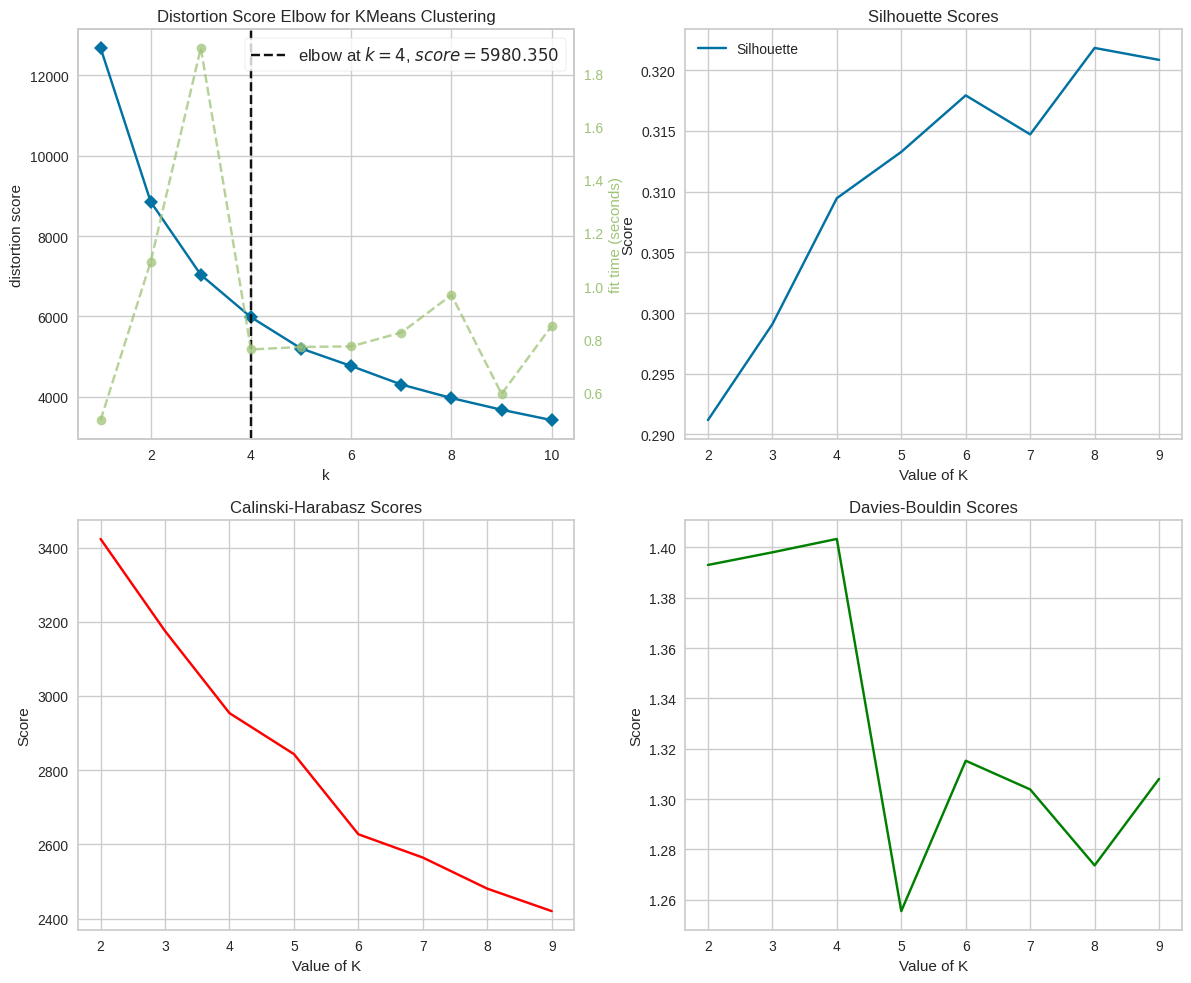

In [ ]:
clustering_evaluation(pca_df)

###3 dimensional PCA

In [ ]:
pca = PCA(n_components=3, random_state = 42)
pca_df_3d = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca_1", "pca_2", "pca_3"])

In [ ]:
pca_df_3d

pca_1     pca_2     pca_3
0     0.138295 -0.708402  0.386151
1    -1.002383 -0.284842 -0.041775
2     0.197316  1.024492  0.510426
3    -0.375783  0.502460  0.582617
4    -0.177010  0.156219  0.452534
...        ...       ...       ...
7906  0.191453  0.462123  1.072562
7907  0.731884 -0.944664 -0.129520
7908  0.474914 -0.693549 -0.282406
7909  0.595341 -1.089908  0.271203
7910 -0.660492 -0.850183  0.713418

[7911 rows x 3 columns]

In [ ]:
fig = px.scatter_3d(pca_df_3d, x='pca_1', y='pca_2', z='pca_3', color=kmeans_model.labels_,width = 800, height = 500)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

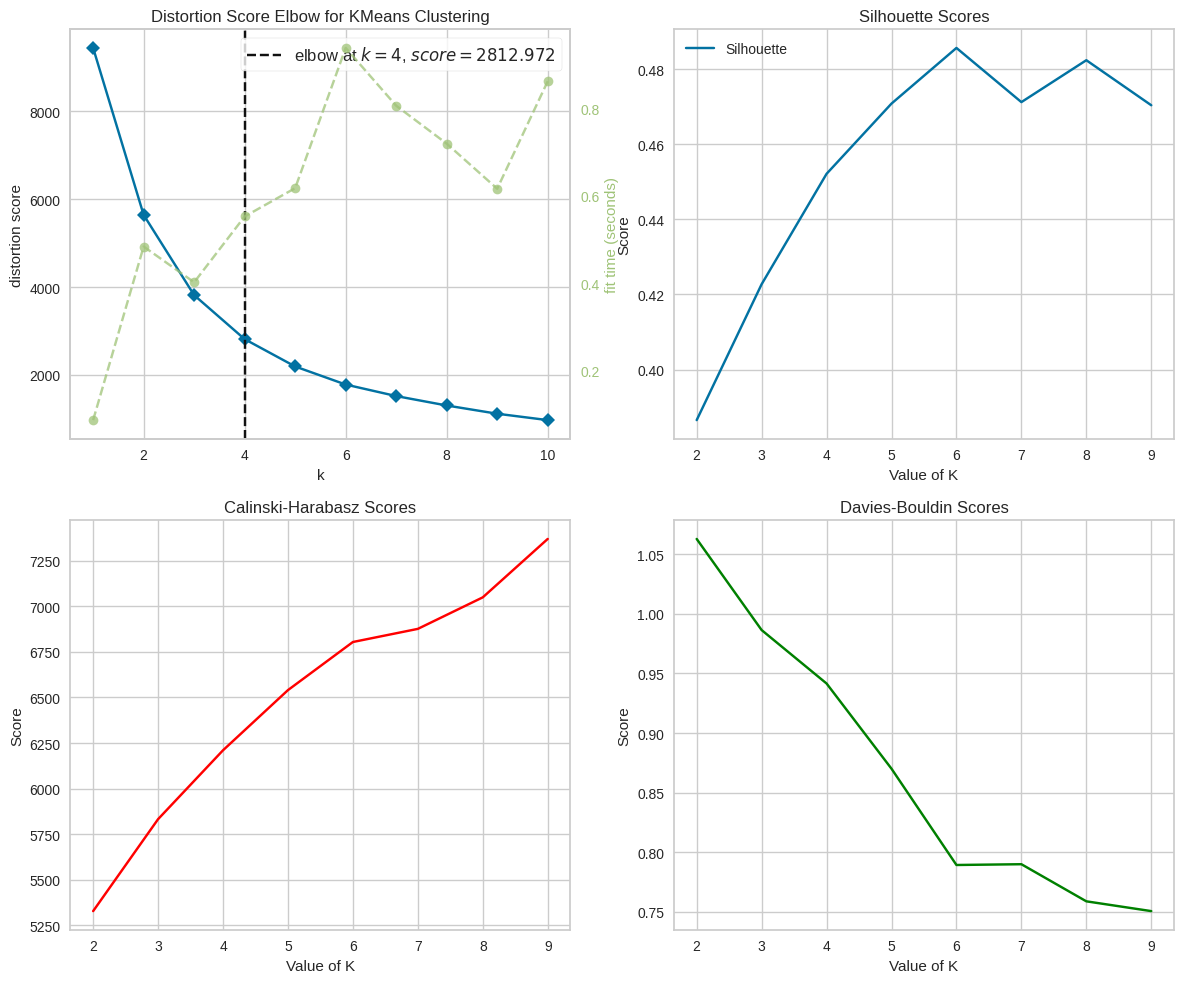

In [ ]:
clustering_evaluation(pca_df_3d)

###2 dimensional PCA

In [ ]:
pca = PCA(n_components=2, random_state = 42)
pca.fit(scaled_data)
pca_df_2d = pd.DataFrame(pca.transform(scaled_data), columns=["pca1", "pca2"])

In [ ]:
pca_df_2d.head()

pca1      pca2
0  0.138295 -0.708402
1 -1.002383 -0.284842
2  0.197316  1.024492
3 -0.375783  0.502460
4 -0.177010  0.156219

In [ ]:
px.scatter(x = pca_df_2d.pca1, y = pca_df_2d.pca2, color=kmeans_model.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

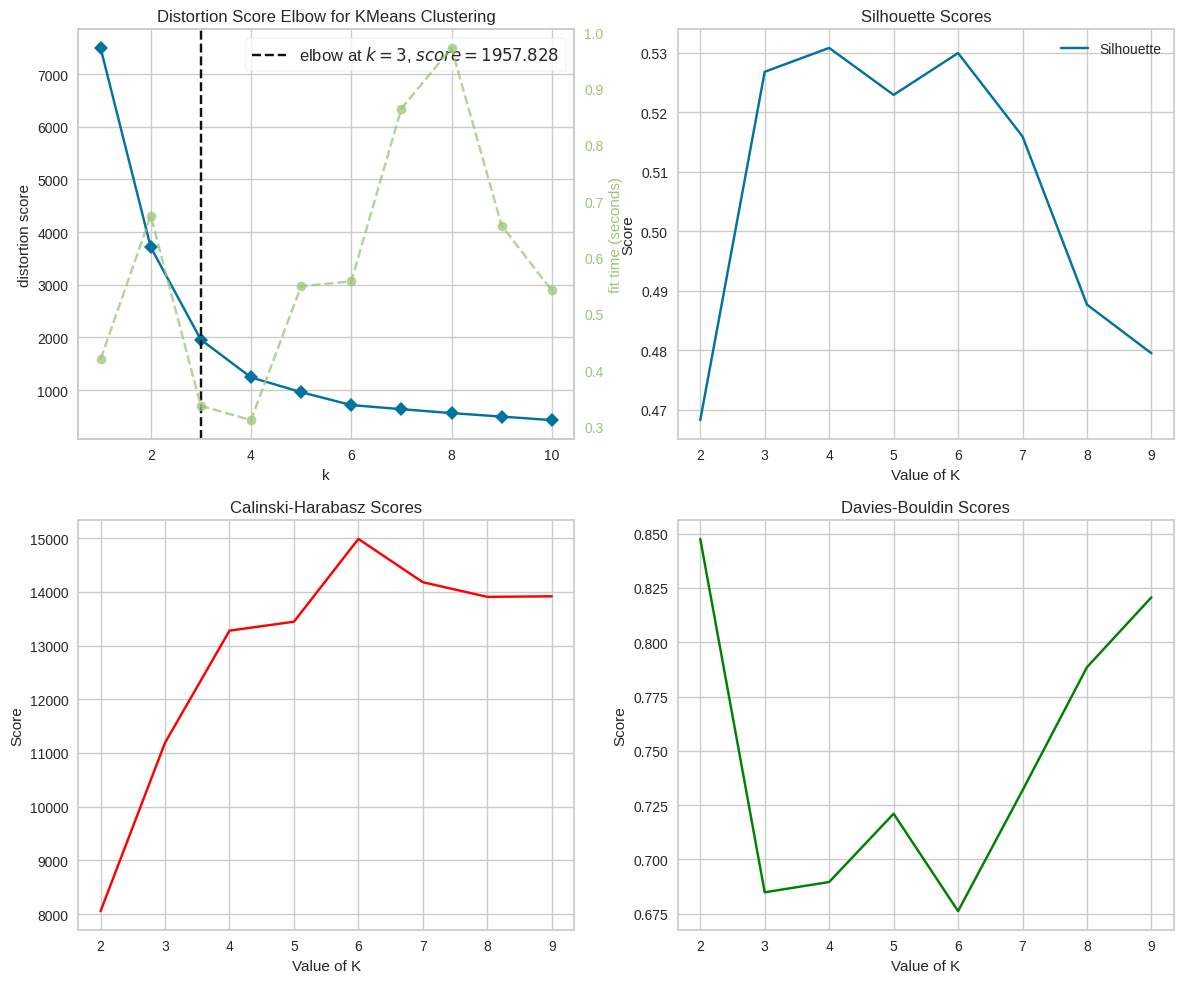

In [ ]:
clustering_evaluation(pca_df_2d)

In [ ]:
kmeans_model_2d = KMeans(n_clusters = 6, random_state = 42)
kmeans_model_2d.fit(pca_df_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6, random_state=42)

In [ ]:
px.scatter(x = pca_df_2d.pca1, y = pca_df_2d.pca2, color=kmeans_model_2d.labels_)

## Hierarchical Clustering

In [ ]:
def hierarchical_clustering():
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))

    elbow_method = KElbowVisualizer(AgglomerativeClustering(), k=(1,11), ax = ax[0, 0])
    elbow_method.fit(scaled_data)

    K = np.arange(2, 11).tolist()
    silhouette_avg = []
    DB_avg = []
    calinski_avg = []
    for num_clusters in K:
        # initialise kmeans
        hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
        hierarchical.fit(scaled_data)
        cluster_labels = hierarchical.labels_
        # Davies_bouldin score: the lower DB the better is clustering
        DB_avg.append(davies_bouldin_score(scaled_data, cluster_labels))

        # calinski_harabasz_score: The higher the index the better is clustering.
        calinski_avg.append(calinski_harabasz_score(scaled_data, cluster_labels))

        # silhouette score: with range[-1: 1], the more close to 1, the better is clustering and vice versa
        silhouette_avg.append(silhouette_score(scaled_data, cluster_labels))
    ax[0, 1].plot(K, silhouette_avg, 'bx-', label='Silhouette')
    ax[0, 1].set_xlabel('Value of K')
    ax[0, 1].set_ylabel('Score')
    ax[0, 1].set_title('Silhouette Scores')
    ax[0, 1].legend()

    ax[1, 0].plot(K, calinski_avg, 'bx-', color = 'red', label='Calinski-Harabasz')
    ax[1, 0].set_xlabel('Value of K')
    ax[1, 0].set_ylabel('Score')
    ax[1, 0].set_title('Calinski-Harabasz Scores')

    ax[1, 1].plot(K, DB_avg, 'bx-', color = 'green', label='Davies-Bouldin')
    ax[1, 1].set_xlabel('Value of K')
    ax[1, 1].set_ylabel('Score')
    ax[1, 1].set_title('Davies-Bouldin Scores')

    plt.tight_layout()
    elbow_method.show()
    plt.show()

<ipython-input-98-4579d6e808b3>:30: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.

<ipython-input-98-4579d6e808b3>:35: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.



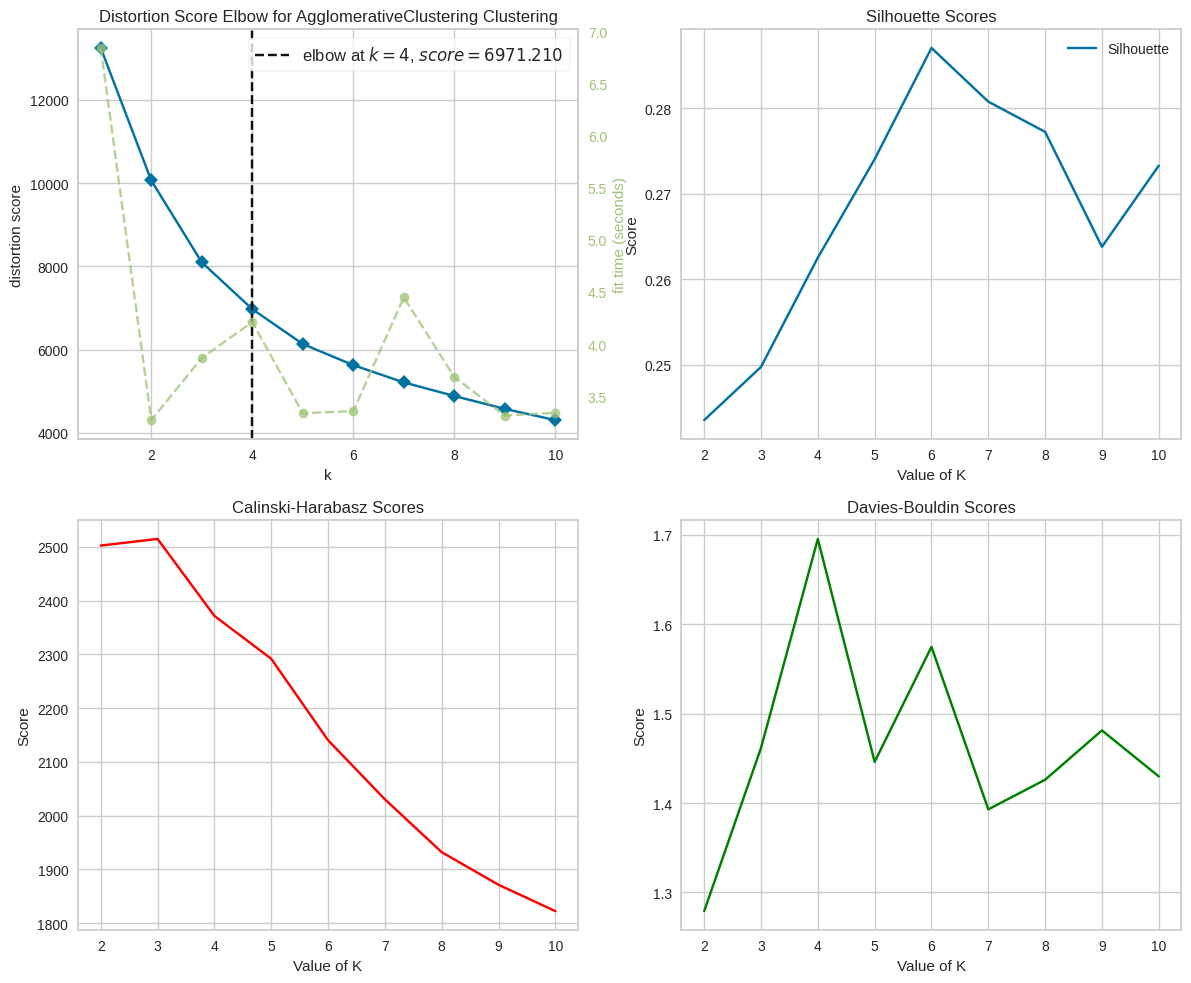

In [ ]:
hierarchical_clustering()

## Take dataframe following to cluster

In [ ]:
def my_silhouette_score(model, X, y=None):
    preds = model.fit_predict(X)
    return silhouette_score(X, preds) if len(set(preds)) > 1 else float('nan')

I don't know why silhoutte_score in sklearn doesn't run correctly in gridsearch, it return only nan so I rewrite it into specific function

Lets try what I gonna take from GridSearchCV

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline(steps=[("pca",PCA()), ("kmean", KMeans(random_state = 42))], verbose = True)
param_grid = {
    'pca__n_components': np.arange(2, 11),
    'kmean__n_clusters': np.arange(2, 11),
    'kmean__init': ['k-means++','random']
    }
model = GridSearchCV(pipe, param_grid, scoring = my_silhouette_score, n_jobs = 3)
model.fit(scaled_data)

[Pipeline] ............... (step 1 of 2) Processing pca, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing kmean, total=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('kmean', KMeans(random_state=42))],
                                verbose=True),
             n_jobs=3,
             param_grid={'kmean__init': ['k-means++', 'random'],
                         'kmean__n_clusters': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'pca__n_components': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring=<function my_silhouette_score at 0x7f397614e950>)

In [ ]:
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)

Best parameter (CV score=0.310):
{'kmean__init': 'random', 'kmean__n_clusters': 10, 'pca__n_components': 8}


That's unexpected =)) anyway I keep K = 6

In [ ]:
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

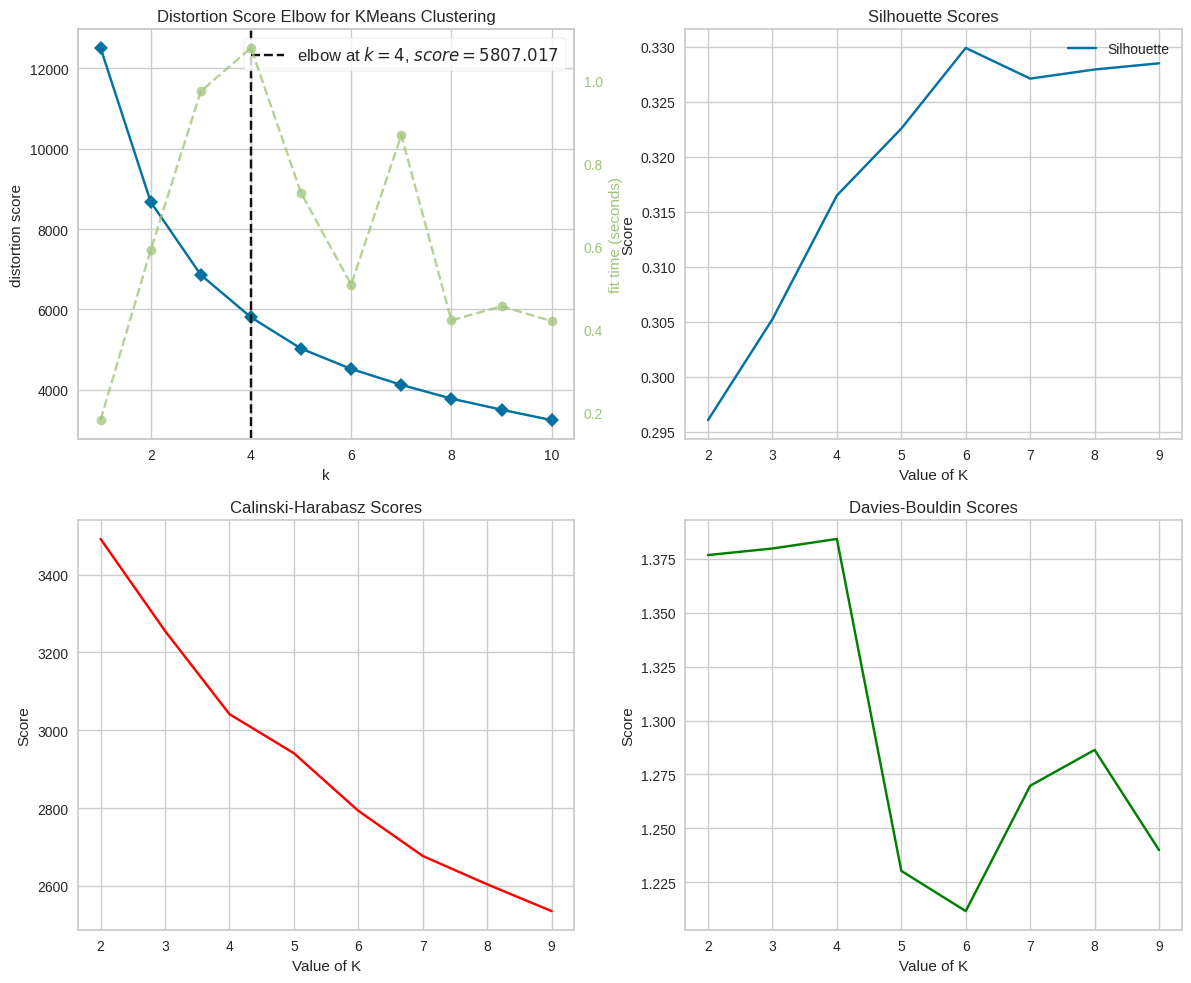

In [ ]:
clustering_evaluation(pca_df)

In [ ]:
cluster = model.labels_
cluster_0 = np.where(cluster==0)
cluster_1 = np.where(cluster==1)
cluster_2 = np.where(cluster==2)
cluster_3 = np.where(cluster==3)
cluster_4 = np.where(cluster==4)
cluster_5 = np.where(cluster==5)

In [ ]:
df.iloc[cluster_0]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
7     1823.652743           1.000000     436.20              0.00   
11     630.794744           0.818182    1492.18           1492.18   
12    1516.928620           1.000000    3217.99           2500.23   
17      41.089489           0.454545     519.00              0.00   
38    6269.418144           1.000000     204.00            204.00   
...           ...                ...        ...               ...   
7835   968.188634           1.000000      69.44              0.00   
7858   218.004416           1.000000       0.00              0.00   
7864    14.097101           1.000000     140.40              0.00   
7872  1075.827234           1.000000     342.65              0.00   
7892    25.192974           0.545455     764.64              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
7                     436.20      0.000000             1.000000   
11                      0.00      0.000000             0.250000   
12                    717.76      0.000000             1.000000   
17                    519.00      0.000000             0.416667   
38                      0.00   2925.699862             0.083333   
...                      ...           ...                  ...   
7835                   69.44      0.000000             0.250000   
7858                    0.00    272.866274             0.000000   
7864                  140.40      0.000000             1.000000   
7872                  342.65    614.082528             0.583333   
7892                  764.64      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
7                       0.000000                          1.000000   
11                      0.250000                          0.000000   
12                      0.250000                          0.916667   
17                      0.000000                          0.333333   
38                      0.083333                          0.000000   
...                          ...                               ...   
7835                    0.000000                          0.250000   
7858                    0.000000                          0.000000   
7864                    0.000000                          1.000000   
7872                    0.000000                          0.500000   
7892                    0.000000                          1.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
7                   0.000000                 0             12        2300.0   
11                  0.000000                 0              6        2000.0   
12                  0.000000                 0             26        3000.0   
17                  0.000000                 0              8        2500.0   
38                  0.333333                12              2        9000.0   
...                      ...               ...            ...           ...   
7835                0.000000                 0              3        1000.0   
7858                0.083333                 2              0         500.0   
7864                0.000000                 0             12        2500.0   
7872                0.250000                 9              7        1200.0   
7892                0.000000                 0             12        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
7      679.065082        532.033990          0.000000      12        3  
11     705.618627        155.549069          0.000000      12        0  
12     608.263689        490.207013          0.250000      12        3  
17     254.590662         73.203221          0.250000      12        0  
38    1237.111661       2049.408839          0.000000      12        2  
...           ...               ...               ...     ...      ...  
7835   251.875749        443.131452          0.000000      12        0  
78

# Discussion & Conclusion

K-means uses distance-based measurements to determine the similarity between data points so It fit only numerical variable

K-means is very sensitive to outliers, noisy, and skewed distribution data. So, we have to handle it carefully

Before applying K-means clustering, there is no collinearity (a high level of correlation between two variables). Correlated variables are not useful for ML segmentation algorithms because they represent the same characteristic of a segment. So correlated variables are nothing but noise. https://trcmarketresearch.com/whitepaper/cluster-analysis-gets-complicated/

As the number of dimensions increases, a distance-based similarity measure converges to a constant value between any given examples. The more variables the more difficult to find strict differences between instances. So apply PCA and scaling is essential for clustering (I choose 8 components to keep 95% information of data)

After experimentation, there are a few fundamental model assumptions:

* The variance of the distribution of each attribute (variable) is spherical (or in other words, the boundaries between k-means clusters are linear);

* All variables have the same variance;

* Each cluster has roughly equal numbers of observations.

* There are various evaluation metrics but it for reference not exactly metrics to the conclusion

Finally, I choose K = 6 with 8 components(after applied PCA) to cluster data